# Data cleaning

This is a dataset about loan amount for which a customer can request a bank with his/her collateral house.

* Gender: Gender of customer requesting for a loan ('F' or 'M').
* Age: Age of customer requesting for a loan (non-negative values).
* Income (USD): Income of customer requesting for a loan (non-negative values).
* Income Stability: Income stability of customer requesting for a loan ("Low" or "High").
* Property Age: Age of the property (non-negative number of days).
* Property Location: Location of the property ("Rural", "Urban", and "Semi-Urban").
* Property Price: Price of the property (USD).
* Loan Sanction Amount (USD): Amount of loan the customer can request for (USD, target value).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and display data
data = pd.read_csv(r"C:\Users\thaia\Downloads\Linear_Regression\Data\house_loan.csv")
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


In [3]:
data.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


In [23]:
data.columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Property Age',
       'Property Location', 'Property Price', 'Loan Sanction Amount (USD)',
       'Debt-to-Income Ratio', 'loan-to-value Ratio',
       'Property Price to Income Ratio'],
      dtype='object')

In [4]:
data=data.drop_duplicates()
data=data.dropna()
data.isnull().sum()

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

In [5]:
print(data.describe(include="all"))

       Gender           Age  Income (USD) Income Stability  Property Age  \
count   47251  47251.000000  47251.000000            47251  47251.000000   
unique      2           NaN           NaN                2           NaN   
top         F           NaN           NaN              Low           NaN   
freq    23646           NaN           NaN            43045           NaN   
mean      NaN     40.005185   2586.498103              NaN   2586.467247   
std       NaN     16.086562   1557.676706              NaN   1557.737980   
min       NaN     18.000000    372.700000              NaN    370.700000   
25%       NaN     25.000000   1653.735000              NaN   1652.820000   
50%       NaN     40.000000   2245.460000              NaN   2244.810000   
75%       NaN     55.000000   3128.610000              NaN   3128.570000   
max       NaN     65.000000  54662.750000              NaN  54647.750000   

       Property Location  Property Price  Loan Sanction Amount (USD)  
count           

# Coding tasks

In [6]:
#Pre-process data: Dealing with categorical data features
from sklearn.preprocessing import OneHotEncoder

# Grouping categorical features (and later replace them with encoded categorical columns)
categorical_features = ['Gender', 'Property Location', 'Income Stability']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# Fit and transform the encoder on the categorical features
encoded_features = encoder.fit_transform(data[categorical_features])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
encoded_data = pd.concat([data.drop(categorical_features, axis=1), encoded_df], axis=1)
# Now 'data_encoded' contains data with one-hot encoded categorical features.

# Rename the categorical columns
encoded_data=encoded_data.rename(columns={'Gender_M': 'Gender',
                                         'Income Stability_Low':'Income Stability',
                                          'Property Location_Semi-Urban':'Property Location (Semi-Urban vs Rural)',
                                          'Property Location_Urban':'Property Location (Urban vs Rural)'})
#Remove any false encoded data
encoded_data = encoded_data.dropna()

# Display the new data
encoded_data.head()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD),Gender,Property Location (Semi-Urban vs Rural),Property Location (Urban vs Rural),Income Stability
0,19.0,1641.25,1651.25,59641.82,21026.420753,0.0,0.0,0.0,1.0
1,29.0,1989.71,1990.71,179858.51,60595.183366,1.0,0.0,1.0,1.0
2,37.0,1849.91,1856.91,117297.62,39181.648002,0.0,0.0,0.0,1.0
3,65.0,2735.18,2747.18,354417.72,128497.710865,1.0,0.0,0.0,0.0
4,62.0,4741.78,4740.78,82049.80,39386.919336,0.0,0.0,1.0,0.0


At here, i want to scale the new categorical feature that:


1.   Gender:
* 'F' : 0
* 'M' : 1
2.   Income Stability:
* 'Low' : 1
* 'High' : 0
3. Property Location:
* Property Location (Semi-Urban to Rural):
  * 'Semi-Urban' : 1
  * 'Rural' : 0
* Property Location (Urban to Rural):
  * 'Urban' : 1
  * 'Rural' : 0





In [8]:
# Pre-process data: determine feature X and label Y
# Get column names.
columns = encoded_data.columns.tolist()

# Remove 'Loan Sanction Amount (USD)' (label y column)
columns.remove('Loan Sanction Amount (USD)')

# Assign a variable to features x, including all columns except 'Price'
feature_data = encoded_data[columns]

# Assign 'Loan Sanction Amount (USD)' to label y
target_data = encoded_data['Loan Sanction Amount (USD)']

In [9]:
from sklearn.model_selection import train_test_split
trainX,testX, trainY,testY = train_test_split(feature_data, target_data, train_size=0.8)
print('Training:' + str(trainX.shape))     # Count data samples in Training set.
print('Test:' + str(testX.shape))          # Count data samples in Test set.

Training:(37764, 8)
Test:(9441, 8)


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Specify the model
model1 = make_pipeline(StandardScaler(), LinearRegression())
model2 = make_pipeline(MinMaxScaler(), LinearRegression())

# Fit the model to the training data
model2.fit(trainX, trainY)

# Access the linear regression model within the pipeline
linear_model = model2.named_steps['linearregression']  # This retrieves the LinearRegression model

# Create a DataFrame for the coefficients
table = pd.DataFrame({
    'Coefficients': trainX.columns,
    'Value': linear_model.coef_  # Access the coefficients
})

# Create a DataFrame for the intercept
intercept_df = pd.DataFrame({'Coefficients': ['Intercept'], 'Value': [linear_model.intercept_]})

# Concatenate the coefficients and intercept DataFrames
table = pd.concat([table, intercept_df], ignore_index=True)

# Set the 'Coefficients' column as the index (optional)
table.set_index('Coefficients', inplace=True)

# Display the table
print(table)

                                                 Value
Coefficients                                          
Age                                         468.369912
Income (USD)                             179669.227347
Property Age                            -131328.615965
Property Price                           360555.067791
Gender                                        6.760844
Property Location (Semi-Urban vs Rural)     -10.846432
Property Location (Urban vs Rural)           10.419382
Income Stability                              5.691504
Intercept                                  1410.800739


In [11]:
# Make prediction on the first 5 samples in the Test set.
print(testY.head().tolist())
print(model2.predict(testX[:5]))

[77219.00496472725, 53544.74107310678, 17054.625877457343, 34129.848735231884, 32549.46978283634]
[76663.41828861 45721.76186885 17578.22846895 33241.01756528
 34654.47364883]


In [12]:
#Calculating the mean absolute error
from sklearn.metrics import mean_absolute_error
Predictions = model2.predict(testX)
MAE_score = mean_absolute_error(y_pred=Predictions, y_true=testY)
print(MAE_score)

1956.843132470082


In [13]:
#Calculating the mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred=Predictions, y_true=testY))

9380107.578077184


# Open discussion questions

### *Does income or income stability have a stronger influence on the loan sanction amount? For example, analyze the data to see if a higher income or a "High" income stability rating leads to a greater loan approval amount?*

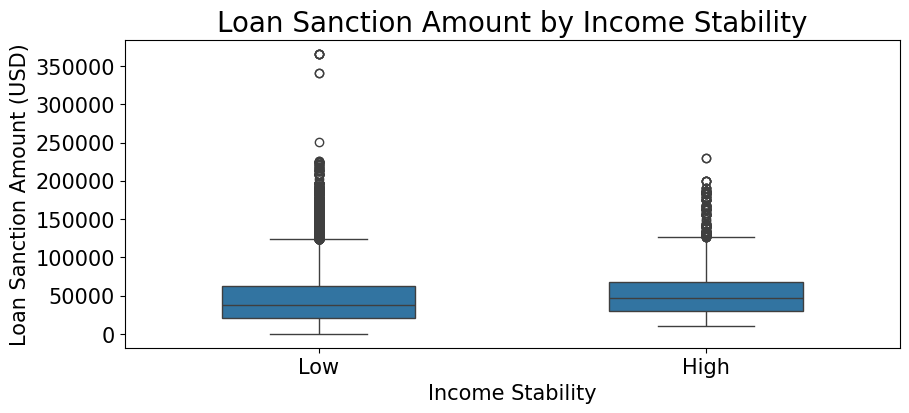

In [14]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=data, x='Income Stability', y='Loan Sanction Amount (USD)', width = 0.5)
plt.title('Loan Sanction Amount by Income Stability', size = 20)
plt.xlabel('Income Stability', size = 15)
plt.ylabel('Loan Sanction Amount (USD)', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

Based on the plot, it give us the intuition that "High" income stability slightly have higher loan sanction ammount than "low" income stability

In [15]:
print(table.loc[['Income (USD)', 'Income Stability'],:])

                          Value
Coefficients                   
Income (USD)      179669.227347
Income Stability       5.691504


ANSWER:

- Income Stability Coefficient is negative (while "Low" = 1 and "High" = 0 ) indicate that High Income Stability tends to have higher Loan sanction ammount than Low Income Stability.
- The coefficient for Income (USD) is much larger in absolute value compared to the coefficient for Income Stability, indicating that Income (USD) has a stronger influence on the loan sanction amount than Income Stability.

### *Is there a significant difference in loan amounts based on property location? For example, compare the average loan amounts for properties in rural, urban, and semi-urban locations?*

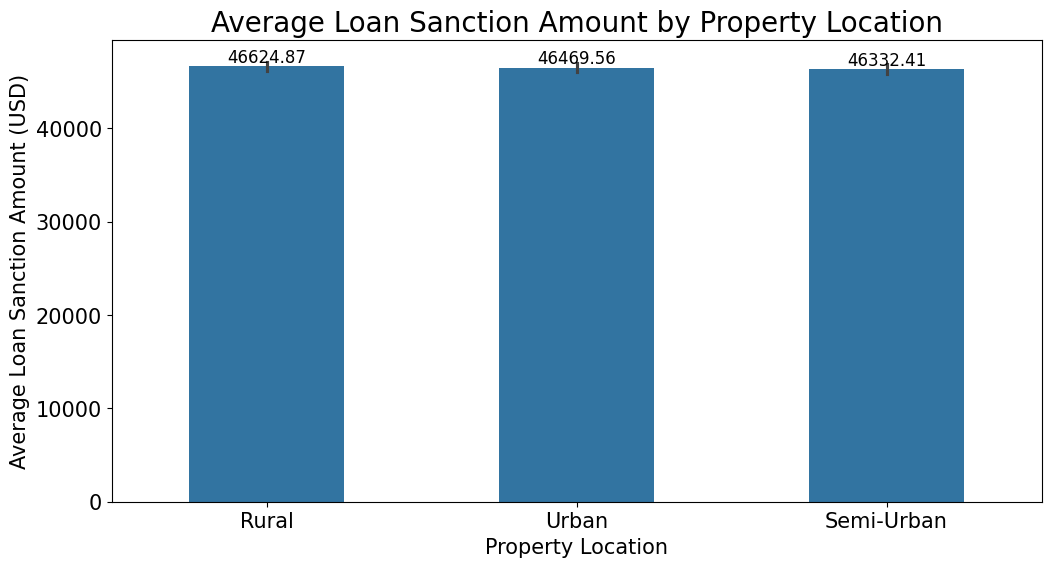

In [16]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=data, x='Property Location', y='Loan Sanction Amount (USD)', estimator='mean', width=0.5)
plt.title('Average Loan Sanction Amount by Property Location',size = 20)
plt.xlabel('Property Location',size = 15)
plt.ylabel('Average Loan Sanction Amount (USD)',size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

# Annotate the average values on the bars
for p in bar_plot.patches:
    # Get the height of each bar
    height = p.get_height()
    # Add text above each bar
    bar_plot.text(
        p.get_x() + p.get_width() / 2,  # x position: center of the bar
        height,  # y position: the height of the bar
        f'{height:.2f}',  # format the number to two decimal places
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        size=12  # font size
    )
plt.show()


In [17]:
data.groupby('Property Location')['Loan Sanction Amount (USD)'].mean()

Property Location
Rural         46624.866530
Semi-Urban    46332.411167
Urban         46469.563769
Name: Loan Sanction Amount (USD), dtype: float64

In [18]:
print(table)

                                                 Value
Coefficients                                          
Age                                         468.369912
Income (USD)                             179669.227347
Property Age                            -131328.615965
Property Price                           360555.067791
Gender                                        6.760844
Property Location (Semi-Urban vs Rural)     -10.846432
Property Location (Urban vs Rural)           10.419382
Income Stability                              5.691504
Intercept                                  1410.800739


ANSWER

The absolute value of coefficients of Property Location are really small compared to other coefficients which means that they affect the Loan sanction ammount insignificantly

### *Is there a gender bias in loan approvals? For example, investigate if there is a difference in average loan amounts offered to male and female applicants?*



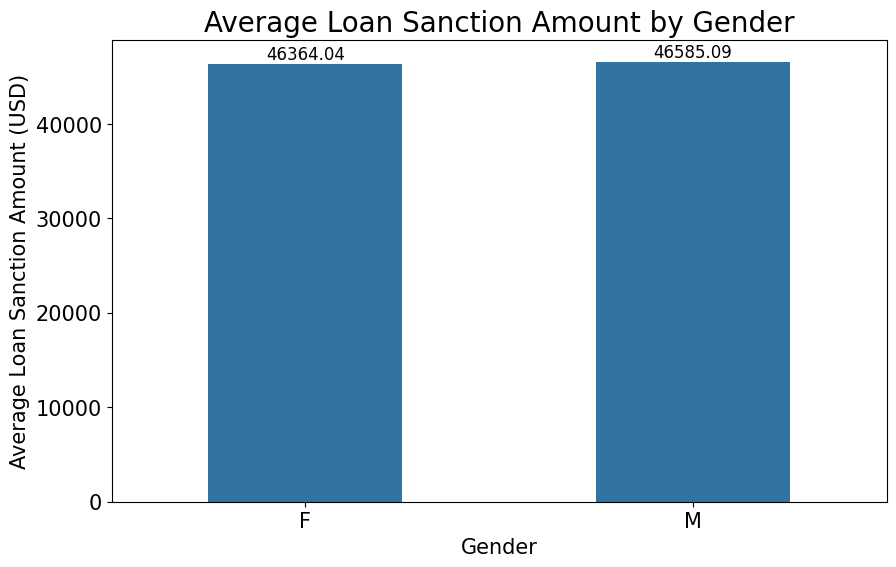

In [19]:
# Create a new DataFrame with average loan amounts by gender
gender_avg_loan = data.groupby('Gender')['Loan Sanction Amount (USD)'].mean().reset_index()

# Create a bar plot without the palette parameter
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_avg_loan, x='Gender', y='Loan Sanction Amount (USD)',width=0.5)

# Add title and labels
plt.title('Average Loan Sanction Amount by Gender', size=20)
plt.xlabel('Gender', size=15)
plt.ylabel('Average Loan Sanction Amount (USD)', size=15)

# Add value annotations on top of the bars
for index, row in gender_avg_loan.iterrows():
    plt.text(index, row['Loan Sanction Amount (USD)'], f'{row["Loan Sanction Amount (USD)"]:.2f}',
             color='black', ha="center", va="bottom",size=12)

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [20]:
print(table.loc[['Gender'],:])

                 Value
Coefficients          
Gender        6.760844


ANSWER:
- Chart show that Men have just slightly higher average loan sanction ammount than woman.
- However the coefficient is negative (where "M" = 1 and "F" = 0) which indicate that being Female tend to have higher loan sanction ammount than Male but this is also very insignificant due to tiny value of coefficient.
- The absolute value of the coefficient of this data feature is very small show that there is no certain bias between gender in loan approvals.


### *Are there any new features you could create from the existing data (e.g., loan-to-value ratio) that might be useful for analyzing loan amounts?*

In [21]:
data['Debt-to-Income Ratio'] = data['Loan Sanction Amount (USD)'] / data['Income (USD)']

In [22]:
# Calculate Loan-to-Value Ratio (LTV) and Debt-to-Income Ratio (DTI), Property Price to Income Ratio
data['loan-to-value Ratio'] = data['Loan Sanction Amount (USD)'] / data['Property Price']
data['Debt-to-Income Ratio'] = data['Loan Sanction Amount (USD)'] / data['Income (USD)']
data['Property Price to Income Ratio'] = data['Property Price'] / data['Income (USD)']
# Display the first few rows of the new columns
data[['loan-to-value Ratio', 'Debt-to-Income Ratio','Property Price to Income Ratio']].head()

,loan-to-value Ratio,Debt-to-Income Ratio,Property Price to Income Ratio
0,0.352545,12.811224,36.339266
1,0.336905,30.454279,90.394334
2,0.334036,21.180300,63.407204
3,0.362560,46.979618,129.577476
4,0.480037,8.306357,17.303586


ANSWER:

There are some new data features i can create from the dataset that might be useful for analyzing loan amounts:


1.   Loan-to-Value (LTV) Ratio: represents the loan ammount relative to the property value.A high LTV typically indicates a riskier loan, as the loan amount is a large proportion of the property value.


2.   Debt-to-Income (DIT) Ratio:
measures how much of the borrower's income is needed to pay the loan debt. A higher DTI can indicate a borrower may have difficulty repaying the loan.


3.  Property Price to Income (PPI) Ratio:
Represents the affordability of the borrower. A high PPI indicate that a borrower may not likely to afford the property



Beyond loan amount prediction, what other insights can be extracted or predicted from this dataset? For example, explore possibilities of using the data to understand borrower behavior, property market trends, or develop targeted marketing strategies.

ANSWER:



*   Borrower Behavior:
  * Including external data features like Transaction history, Credit Score, this dataset can help lender estimate Borrower's Behaviors, the likelihood their repayment which help the lenders manage risk more effectively

*   Property Market Trends:
  * Using features like Property Location and Property Price and map the data to to geographic regions can visualiza the property values trends and lending patterns which can highlight the growth or decline of a specific area.
  * Adding external timeline features can help to predict property values or assess trends in property prices over time
* Targeted marketing strategies:
  * Creating Borrower Segmentations that are more likely to respond to specific loan products (e.g., Marital-status, Number_of_family_members, Year_education, First_time hombuyer loans,...) can help designing marketing campaigns.
  * Develops insight based on borrower sementations to know why borrowers are more likely to refinance or take out additional loans and use the information to improve borrower's retention efforts.


